<a href="https://colab.research.google.com/github/vorstcavry/oneclick-colabwebui/blob/https%2Fgithub.com%2FBing-su%2Fsd-webui-tunnels/Tampilan_Simpel_SD_(Beta_Test1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jangan lupa dibaca sampai bawah**
untuk menjalankan script ini tidak diperlukan spek tinggi karena menggunakan layanan berbasis cloud milik google. untuk kecepatan download file tergantung koneksi internet google dan juga banyaknya file yang didownload

##Instalasi sekitar 2-5 menit

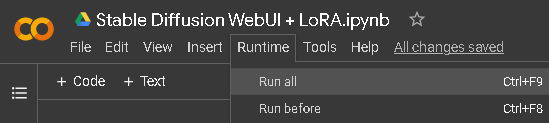

# **Bagi yang mau support saya bisa menuju saweria dibawah ini**
 <a href="https://saweria.co/VorstCavry"><img alt="Saweria" src="https://img.shields.io/badge/Saweria-7B3F00?style=flat&logo=ko-fi&logoColor=white"/></a>

#**Update Stable Diffusion** 

In [ ]:
#@markdown #***SET UP STABLE DIFFUSION WEBUI***
%cd /content

%env TF_CPP_MIN_LOG_LEVEL=1

!apt -y update -qq
!wget http://launchpadlibrarian.net/367274644/libgoogle-perftools-dev_2.5-2.2ubuntu3_amd64.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/google-perftools_2.5-2.2ubuntu3_all.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/libtcmalloc-minimal4_2.5-2.2ubuntu3_amd64.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/libgoogle-perftools4_2.5-2.2ubuntu3_amd64.deb
!apt install -qq libunwind8-dev
!dpkg -i *.deb
%env LD_PRELOAD=libtcmalloc.so
!rm *.deb

!apt -y install -qq aria2
!pip install -q torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1 torchtext==0.14.1 torchdata==0.5.1 --extra-index-url https://download.pytorch.org/whl/cu116 -U
!pip install -q xformers==0.0.16 triton==2.0.0 -U

!git clone -b v2.1 https://github.com/camenduru/stable-diffusion-webui
!git clone https://huggingface.co/embed/negative /content/stable-diffusion-webui/embeddings/negative
!git clone https://huggingface.co/embed/lora /content/stable-diffusion-webui/models/Lora/positive
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/embed/upscale/resolve/main/4x-UltraSharp.pth -d /content/stable-diffusion-webui/models/ESRGAN -o 4x-UltraSharp.pth
!wget https://raw.githubusercontent.com/camenduru/stable-diffusion-webui-scripts/main/run_n_times.py -O /content/stable-diffusion-webui/scripts/run_n_times.py
!git clone https://github.com/deforum-art/deforum-for-automatic1111-webui /content/stable-diffusion-webui/extensions/deforum-for-automatic1111-webui
!git clone https://github.com/camenduru/stable-diffusion-webui-images-browser /content/stable-diffusion-webui/extensions/stable-diffusion-webui-images-browser
!git clone https://github.com/camenduru/stable-diffusion-webui-huggingface /content/stable-diffusion-webui/extensions/stable-diffusion-webui-huggingface
!git clone https://github.com/camenduru/sd-civitai-browser /content/stable-diffusion-webui/extensions/sd-civitai-browser
!git clone https://github.com/kohya-ss/sd-webui-additional-networks /content/stable-diffusion-webui/extensions/sd-webui-additional-networks
!git clone https://github.com/Mikubill/sd-webui-controlnet /content/stable-diffusion-webui/extensions/sd-webui-controlnet
!git clone https://github.com/camenduru/openpose-editor /content/stable-diffusion-webui/extensions/openpose-editor
!git clone https://github.com/jexom/sd-webui-depth-lib /content/stable-diffusion-webui/extensions/sd-webui-depth-lib
!git clone https://github.com/hnmr293/posex /content/stable-diffusion-webui/extensions/posex
!git clone https://github.com/camenduru/sd-webui-tunnels /content/stable-diffusion-webui/extensions/sd-webui-tunnels
!git clone https://github.com/etherealxx/batchlinks-webui /content/stable-diffusion-webui/extensions/batchlinks-webui
!git clone https://github.com/camenduru/stable-diffusion-webui-catppuccin /content/stable-diffusion-webui/extensions/stable-diffusion-webui-catppuccin
!git clone https://github.com/KohakuBlueleaf/a1111-sd-webui-locon /content/stable-diffusion-webui/extensions/a1111-sd-webui-locon
!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui-rembg /content/stable-diffusion-webui/extensions/stable-diffusion-webui-rembg
!git clone https://github.com/ashen-sensored/stable-diffusion-webui-two-shot /content/stable-diffusion-webui/extensions/stable-diffusion-webui-two-shot
!git clone https://github.com/camenduru/sd_webui_stealth_pnginfo /content/stable-diffusion-webui/extensions/sd_webui_stealth_pnginfo
%cd /content/stable-diffusion-webui
!git reset --hard

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_canny-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_canny-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_depth-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_depth-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_hed-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_hed-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_mlsd-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_mlsd-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_normal-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_normal-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_openpose-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_openpose-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_scribble-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_scribble-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_seg-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_seg-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/hand_pose_model.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/openpose -o hand_pose_model.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/body_pose_model.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/openpose -o body_pose_model.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/dpt_hybrid-midas-501f0c75.pt -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/midas -o dpt_hybrid-midas-501f0c75.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/mlsd_large_512_fp32.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/mlsd -o mlsd_large_512_fp32.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/mlsd_tiny_512_fp32.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/mlsd -o mlsd_tiny_512_fp32.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/network-bsds500.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/hed -o network-bsds500.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/upernet_global_small.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/uniformer -o upernet_global_small.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_style_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_style_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_sketch_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_sketch_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_seg_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_seg_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_openpose_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_openpose_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_keypose_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_keypose_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_depth_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_depth_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_color_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_color_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_canny_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_canny_sd14v1.pth

!mkdir /content/stable-diffusion-webui/models/Lora
!mkdir /content/stable-diffusion-webui/models/hypernetworks
!mkdir /content/stable-diffusion-webui/extensions/stable-diffusion-webui-aesthetic-gradients
!mkdir /content/stable-diffusion-webui/extensions/stable-diffusion-webui-aesthetic-gradients/aesthetic_embeddings

#install-vae-untuk-model-checkpoint-yang-akan-dipakai
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/stabilityai/sd-vae-ft-mse-original/resolve/main/vae-ft-mse-840000-ema-pruned.ckpt -d /content/stable-diffusion-webui/models/VAE -o vae-ft-mse-840000-ema-pruned.ckpt 
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/vaecollection/resolve/main/WD-v2.vae.pt -d /content/stable-diffusion-webui/models/VAE -o WD-v2.vae.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/vaecollection/resolve/main/clearvae_main.safetensors -d /content/stable-diffusion-webui/models/VAE -o clearvae_main.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/vaecollection/resolve/main/kl-f8-anime.ckpt -d /content/stable-diffusion-webui/models/VAE -o kl-f8-anime.ckpt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/vaecollection/resolve/main/kl-f8-anime2.ckpt -d /content/stable-diffusion-webui/models/VAE -o kl-f8-anime2.ckpt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/vaecollection/resolve/main/nai.vae.pt -d /content/stable-diffusion-webui/models/VAE -o nai.vae.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/vaecollection/resolve/main/orangemix.vae.pt -d /content/stable-diffusion-webui/models/VAE -o orangemix.vae.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/vaecollection/resolve/main/pastel-waifu-diffusion.vae.pt -d /content/stable-diffusion-webui/models/VAE -o pastel-waifu-diffusion.vae.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/vaecollection/resolve/main/vaeextremecolors_v10.pt -d /content/stable-diffusion-webui/models/VAE -o vaeextremecolors_v10.pt

#Bonus Embedding(s)
!git clone https://huggingface.co/nolanaatama/embeddings /content/stable-diffusion-webui/embeddings

#install-lora
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/lora/resolve/main/cuteGirlMix.safetensors -d /content/stable-diffusion-webui/models/Lora -o cuteGirlMix.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/lora/resolve/main/LoraBraless.safetensors -d /content/stable-diffusion-webui/models/Lora -o LoraBraless.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/lora/resolve/main/chilloutmixlora.safetensors -d /content/stable-diffusion-webui/models/Lora -o chilloutmixlora.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/loraasia/resolve/main/japaneseDollLikeness_v15.safetensors -d /content/stable-diffusion-webui/models/Lora -o japaneseDollLikeness_v15.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/loraasia/resolve/main/koreanDollLikeness_v20.safetensors -d /content/stable-diffusion-webui/models/Lora -o koreanDollLikeness_v20.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/vorstcavry/loraasia/resolve/main/taiwanDollLikeness_v15.safetensors -d /content/stable-diffusion-webui/models/Lora -o taiwanDollLikeness_v15.safetensors

#@markdown Pilih Model yang akan di gunakan di stable diffusion 

#@markdown (hapus centang model yang tidak dipakai) 

#@markdown **CONTOH STYLE GAMBAR ADA DI BAWAH**
ChillOutMix = False #@param {type:"boolean"}
Figure = False #@param {type:"boolean"}
PerfectWorld = False #@param {type:"boolean"}

with open("models.txt", "w") as f:
     if ChillOutMix :
        f.write("https://huggingface.co/AnonPerson/ChilloutMix/resolve/main/ChilloutMix-ni-fp16.safetensors\n"
                " out=ChilloutMix-ni.safetensors\n")
     else:
          pass
     if Figure :
        f.write("https://huggingface.co/vorstcavry/figurestyle/resolve/main/aoaoko.safetensors\n"
                " out=aoaoko.safetensors\n")
     else:
          pass
     if PerfectWorld :
        f.write("https://huggingface.co/ckpt/perfect_world/resolve/main/perfectWorld_v2Baked.safetensors\n"
                " out=perfectWorld_v2Baked.safetensors\n")
     else:
          pass
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M --input-file models.txt -d /content/stable-diffusion-webui/models/Stable-diffusion
!rm -rf /content/models.txt

!sed -i -e '''/    prepare_environment()/a\    os.system\(f\"""sed -i -e ''\"s/dict()))/dict())).cuda()/g\"'' /content/stable-diffusion-webui/repositories/stable-diffusion-stability-ai/ldm/util.py""")''' /content/stable-diffusion-webui/launch.py
!sed -i -e 's/fastapi==0.90.1/fastapi==0.89.1/g' /content/stable-diffusion-webui/requirements_versions.txt


!mkdir /content/stable-diffusion-webui/extensions/deforum-for-automatic1111-webui/models
!sed -i -e 's/\"sd_model_checkpoint\"\,/\"sd_model_checkpoint\,sd_vae\,CLIP_stop_at_last_layers\"\,/g' /content/stable-diffusion-webui/modules/shared.py

!python launch.py --listen --xformers --enable-insecure-extension-access --theme dark --gradio-queue --multiple
     

# Tunggu sampai link  muncul 👆

tunggu semua proses selesi agar link muncul, di sini tersedia 4 link

**KLIK SALAH SATU, JIKA SALAH SATU LINK MENGALAMI ERROR BISA GANTI DENGAN LINK SATUNYA LAGI**


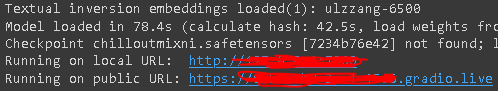

# Contoh Gambar Model Diatas

# **1. Chilloutmix**
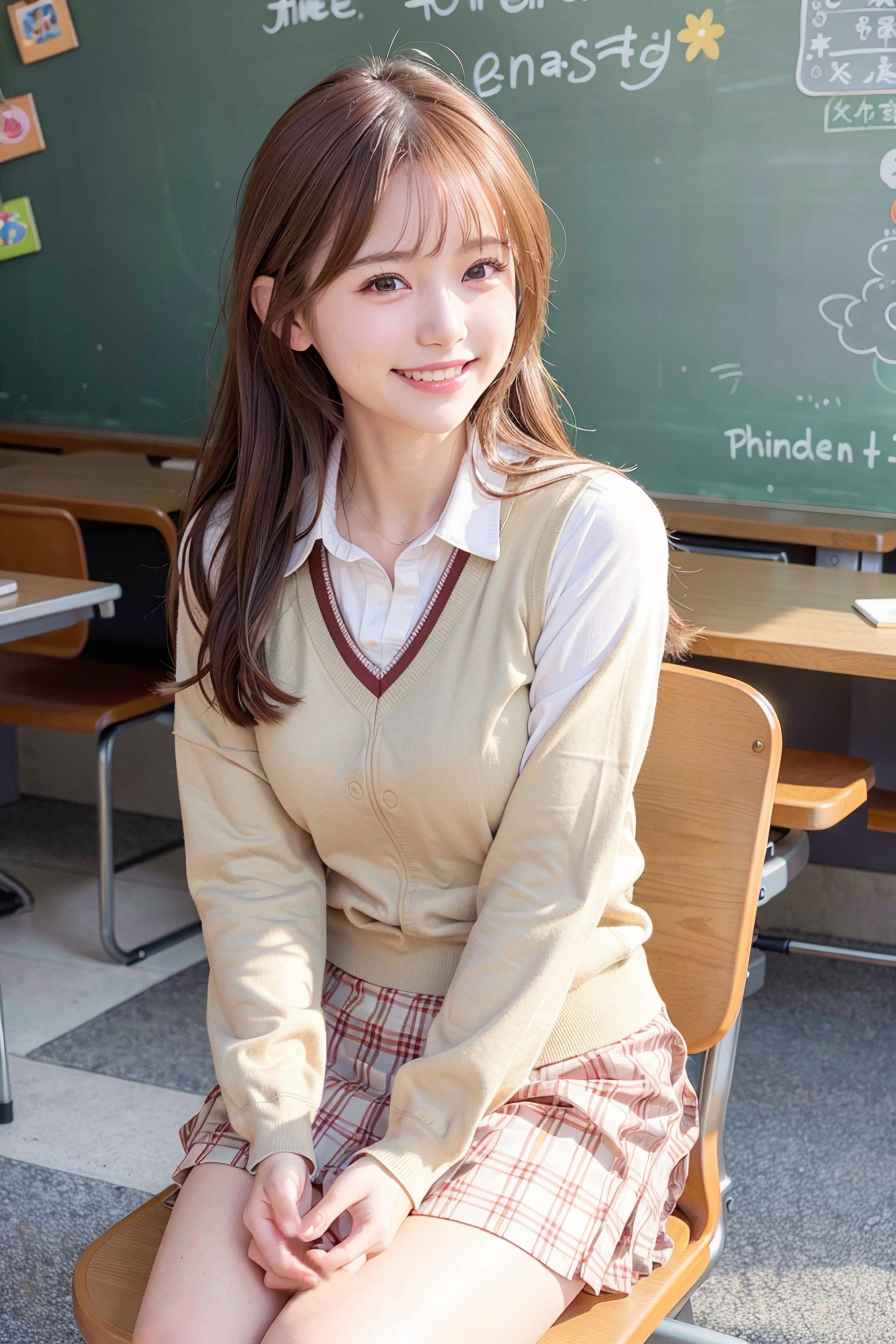

#**2. Figure**
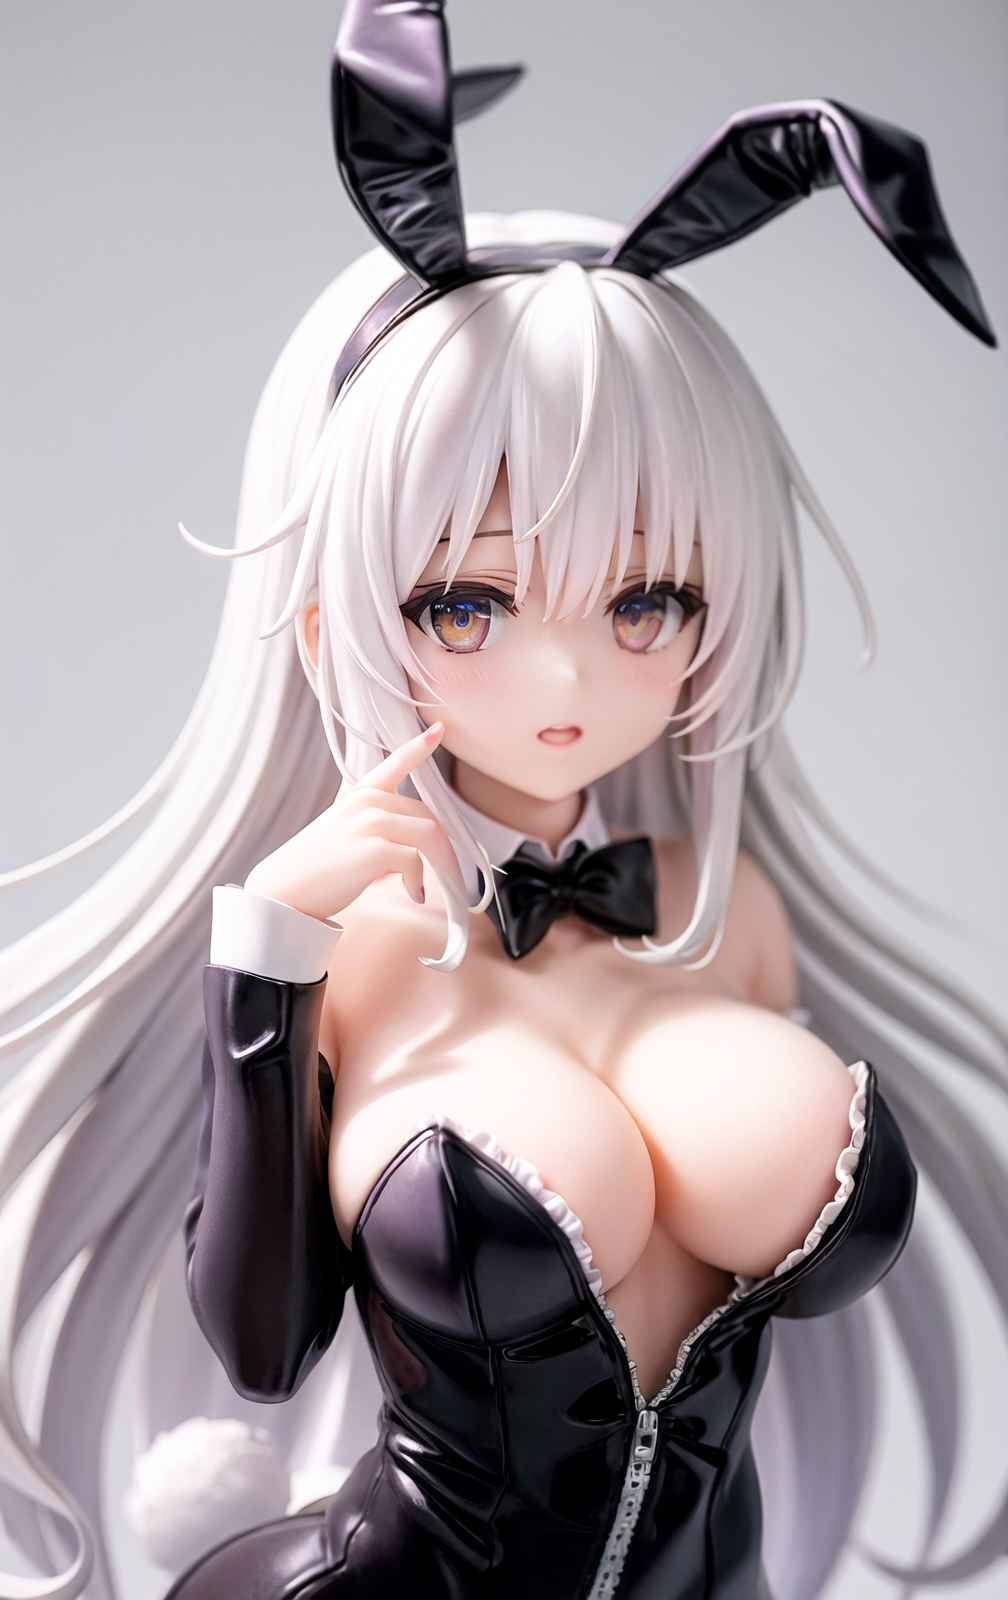
#**3. Perfect World**
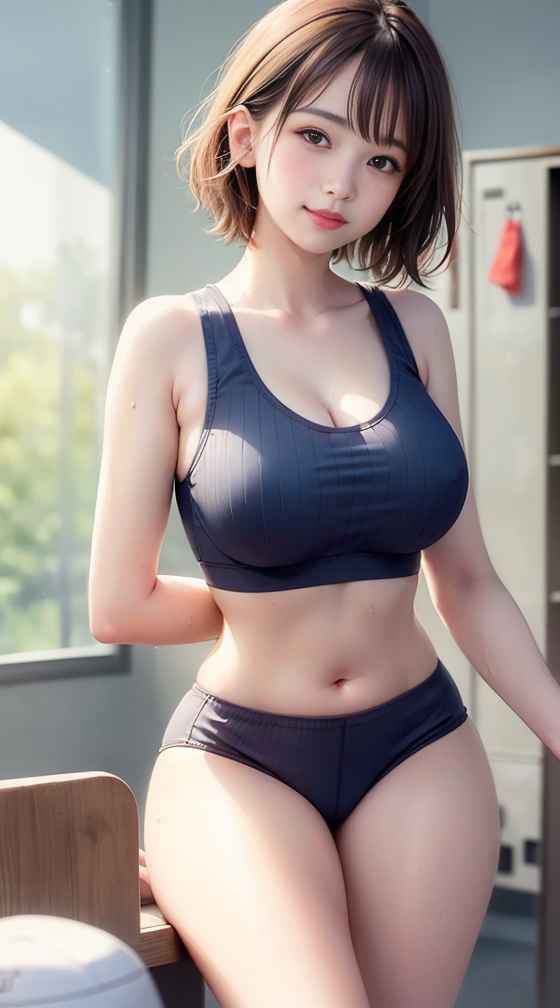
